In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
global_avg = pd.read_csv("global.csv")
local_avg = pd.read_csv("local.csv")

In [99]:
local_avg = local_avg.dropna() #Clearing NULLs

In [100]:
# for loop to equalize the two tabels
for i in global_avg.index:
    if global_avg.at[i,"year"] < 1843:
        global_avg.drop(i,inplace = True)

In [101]:
local_avg
#if we look at index 1 there is a fall in avg_temp, we think the it is outlier data
# we will clear it when we use the formula

,year,city,country,avg_temp
0,1843,Riyadh,Saudi Arabia,24.74
1,1844,Riyadh,Saudi Arabia,15.45
2,1845,Riyadh,Saudi Arabia,20.82
5,1848,Riyadh,Saudi Arabia,24.56
6,1849,Riyadh,Saudi Arabia,24.80
...,...,...,...,...
166,2009,Riyadh,Saudi Arabia,26.71
167,2010,Riyadh,Saudi Arabia,27.37
168,2011,Riyadh,Saudi Arabia,26.40
169,2012,Riyadh,Saudi Arabia,26.83


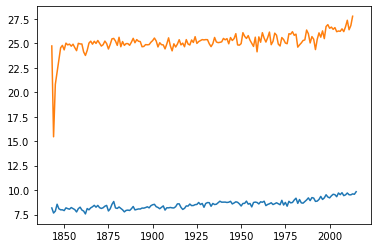

In [102]:
plt.plot(global_avg['year'], global_avg['avg_temp'], label = 'global')
plt.plot(local_avg['year'], local_avg['avg_temp'], label = 'local')
plt.show()
# a look for the plots without using Simple Moving Average Calculation

In [ ]:
# resetting the index to 0 
global_avg = global_avg.reset_index(drop=True)
local_avg = local_avg.reset_index(drop=True)

# Simple Moving Average
$$ \frac{SMA=\ \ (x_y+x_{y-1}+\ldots+x_{y-n-1})}{n} $$
### x = the year
### y = the index of the year 
### n = the number of years in period $$

In [109]:
sma_global_temp = [] 
sma_global_year = []
for i in global_avg.index[5:]: # 5: to clear the outlier , also to make sure the formula work
    sma_value = 0
    for j in range(4):
        sma_value += global_avg.at[i-j, 'avg_temp'] # sma formula
    sma_value /= 4
    sma_global_temp.append(sma_value) # appending values
    sma_global_year.append(global_avg.at[i,"year"]) # appending values
sma_local_temp = []
sma_local_year = []
for i in local_avg.index[5:]:
    sma_value = 0
    for j in range(4):
        sma_value += local_avg.at[i-j, 'avg_temp']
    sma_value /= 4
    sma_local_temp.append(sma_value)
    sma_local_year.append(local_avg.at[i,"year"])

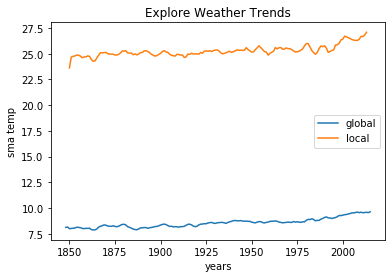

In [110]:
plt.plot(sma_global_year, sma_global_temp, label='global')
plt.plot(sma_local_year,  sma_local_temp, label='local')
plt.xlabel('years')
plt.ylabel('sma temp')
plt.title("Explore Weather Trends")
plt.legend()
plt.show()
#showing the sma line graph